# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["plus", "cette", "être", "tout", "fait", "comme", "leurs", "deux",
"bien", "après", "sans", "dont", "tous", "encore", "faire", "peut",
"aussi", "ceux", "elles", "alors", "toujours", "devant",
"également", "aujourd", "dernier", "première", "nouvelle", "certains",
"quatre", "trop", "dès", "quand", "notamment", "cependant", "jamais",
"ici", "beaucoup", "ensuite", "assez", "puis", "laquelle", "chaque",
"seulement", "entre", "sous", "dit", "autres", "très", "autre",
"ans", "ainsi", "peu", "non", "depuis", "avoir", "moins", "toute",
"trois", "toutes", "quelques", "faut", "cet", "celui", "doit", "jusqu",
"vie", "déjà", "celle", "vers", "dire", "cela", "fois", "donc",
"pendant", "année", "cours", "grande", "grand", "part", "rue", "avant", 
"mois", "van", "jour", "heures", "point", "situation", "question", "soir", 
"nouveau", "fin", "hui", "jours", "suite", "vue", "ville", "car", "moment", 
"place", "compte", "voir", "cas", "rien", "effet", "matin", "ailleurs", 
"plusieurs", "vient", "partie", "saint", "chez", "janvier", "près", 
"générale", "mardi", "dimanche", "lundi", "mars", "décembre", "octobre", 
"tant", "reste", "ment", "bon", "fort", "pris", "maison", "jeudi", "nom", 
"temps", "lieu", "homme", "problème", "hommes", "midi", "heure", "parce",
"raison", "cinq", "nord", "œuvre", "années", "avril", "semaine",
"pourrait", "juin", "selon", "novembre", "donné", "bas", "porte", "prendre", 
"quelque", "enfin",  "nombre","actuellement", "dernière", "enfants", 
"vendredi", "mis","aucun","bonne", "presse", "mercredi", "parmi","enfin",  
"juillet", "samedi", "journal","quelque", 
]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
data_path = '../../data'
txt_path = '../../data/txt'

txts = [
    f for f in os.listdir(txt_path)
    if os.path.isfile(os.path.join(txt_path, f))
]

len(txts)

988

In [4]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)        


988

In [5]:
    # Écrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'

# Créer le dossier s'il n'existe pas
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

# Fichier de sortie unique (pour tout le corpus)
output_file = 'corpus.txt'   # tu peux changer le nom si tu veux

with open(os.path.join(temp_path, output_file), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [6]:
# Lire le contenu du fichier temporaire et inspecter les "déchets"
output_file = 'corpus.txt'  # même nom que dans l'étape précédente

with open(os.path.join(temp_path, output_file), 'r', encoding='utf-8') as f:
    before = f.read()

# Afficher les 500 premiers caractères pour inspection
before[:500]

" ^a_Mî@20jagMâ: Sam. ler et dim. 2 février 1.'17 ELITES Dans sa conférence de jeudi à Bruxelles, Roger Garaudy a eu une définition mordante de l'ente : « des intellectuels qui s'appellent l'élite et qui sont parfois les seuls à s'appeler ainsi ». Rien n'est plus cruellement vrai. Pendant des lustres, le commun des mortels a rangé dans l'élite quelques messieurs bien habil. lés, possédant, comme on dit, un joli brin de plume, et qui par. latent bien. Or, la guerre et l'après-guerre ont prouvé que"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [7]:
def clean_text(input_file, folder=None, output_suffix="_clean"):
    """
    Nettoie un fichier texte en conservant uniquement les mots alphabétiques 
    de plus de 2 lettres, en majuscules et en excluant les stopwords.

    Parameters:
    - input_file : nom du fichier d'entrée (ex: 'corpus.txt')
    - folder : chemin du dossier contenant le fichier (optionnel)
    - output_suffix : suffixe pour le fichier nettoyé (défaut "_clean")
    """
    if folder is None:
        input_path = input_file
        output_path = input_file.replace(".txt", f"{output_suffix}.txt")
    else:
        input_path = os.path.join(folder, input_file)
        output_path = os.path.join(folder, input_file.replace(".txt", f"{output_suffix}.txt"))

    # Ouvrir le fichier de sortie
    with open(output_path, "w", encoding='utf-8') as output:
        # Lire le fichier d'entrée
        with open(input_path, 'r', encoding='utf-8') as f:
            text = f.read()
            words = nltk.wordpunct_tokenize(text)
            # Filtrer les mots : longueur >2, alphabétiques, pas dans les stopwords
            kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
            kept_string = " ".join(kept)
            output.write(kept_string)

    return f'Output has been written in {output_path}!'
    

### Appliquer la fonction sur le fichier complet de l'année

In [8]:
clean_text('corpus.txt', folder=temp_path)

'Output has been written in ../../data/tmp\\corpus_clean.txt!'

In [9]:
# Vérifier le résultat sur le fichier nettoyé corpus_clean.txt
output_file = 'corpus_clean.txt'  # nom du fichier généré par clean_text

with open(os.path.join(temp_path, output_file), 'r', encoding='utf-8') as f:
    after = f.read()

# Afficher les 500 premiers caractères
after[:500]

'SAM LER DIM FÉVRIER ELITES CONFÉRENCE BRUXELLES ROGER GARAUDY DÉFINITION MORDANTE ENTE INTELLECTUELS APPELLENT ÉLITE PARFOIS SEULS APPELER CRUELLEMENT VRAI LUSTRES COMMUN MORTELS RANGÉ ÉLITE MESSIEURS HABIL LÉS POSSÉDANT JOLI BRIN PLUME LATENT GUERRE GUERRE PROUVÉ PLUPART ÊTRES TONNEAUX VIDES ÉLITES MONTAIENT COU FAUSSES ÉLITES VÉRITABLE ÉLITE APANAGE CLASSE CONNAIS ÉLITE MAINS CALLEUSES VÊTEMENTS RÂPÉS CŒUR ACCROCHÉ SENTENT SOLIDAIRES VOISIN LUTTENT ESPÈRENT FOI SOURIENT INTERROGENT CHERCHENT T'

## Nuage de mots

### Afficher les termes les plus fréquents


In [10]:
frequencies = Counter(after.split())

# Prendre les 20 mots les plus fréquents
top = Counter(frequencies).most_common(100)

# Afficher
for i, (mot, freq) in enumerate(top, start=1):
    print(f"{i}. {mot} → score : {freq}")

1. PAYS → score : 8907
2. GOUVERNEMENT → score : 8072
3. MINISTRE → score : 6987
4. CONTRE → score : 6757
5. BRUXELLES → score : 5725
6. POLITIQUE → score : 5480
7. PRÉSIDENT → score : 5207
8. BELGIQUE → score : 5185
9. PRIX → score : 4980
10. GUERRE → score : 4630
11. GÉNÉRAL → score : 4505
12. PREMIER → score : 4002
13. BELGE → score : 3817
14. CONSEIL → score : 3789
15. ETAT → score : 3732
16. MILLIONS → score : 3721
17. FRANCE → score : 3628
18. PARIS → score : 3479
19. FRANCS → score : 3389
20. PARTI → score : 3313
21. ETATS → score : 3246
22. TRAVAIL → score : 3177
23. LOI → score : 3039
24. MONDE → score : 2993
25. ÉCONOMIQUE → score : 2947
26. UNIS → score : 2879
27. ORDRE → score : 2773
28. AFFAIRES → score : 2727
29. FRANÇAIS → score : 2670
30. MARCHÉ → score : 2652
31. PLAN → score : 2590
32. NATIONALE → score : 2538
33. CHAMBRE → score : 2515
34. BELGES → score : 2511
35. EUROPE → score : 2503
36. LONDRES → score : 2474
37. PROJET → score : 2435
38. ALLEMAGNE → score : 2421

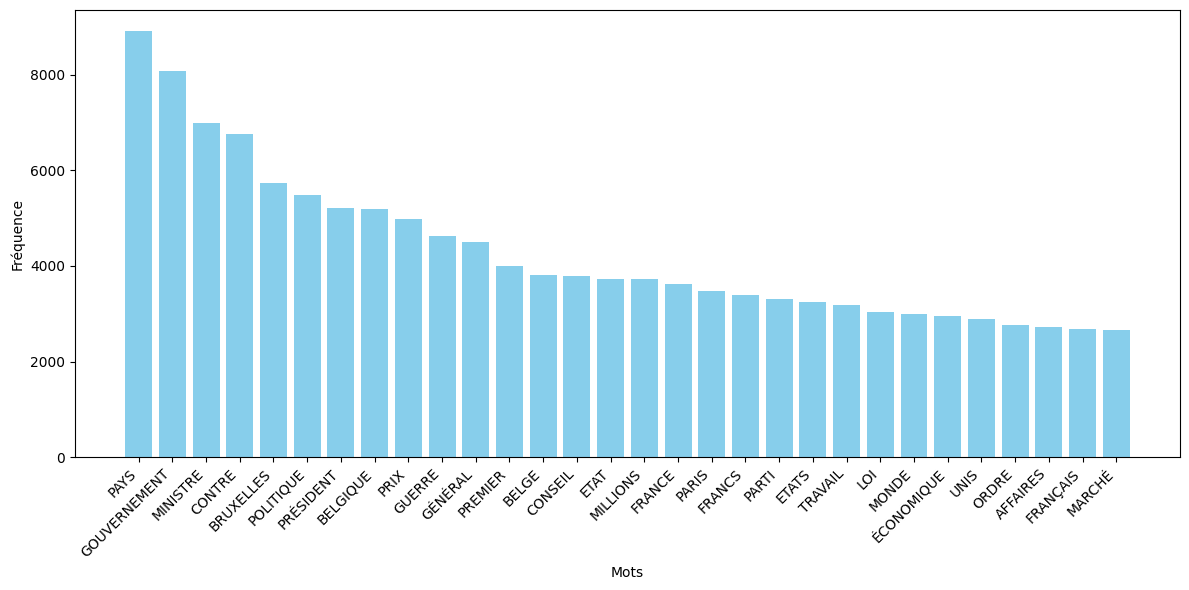

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

# Compter la fréquence des mots
frequencies = Counter(after.split())

# Prendre les 30 mots les plus fréquents
top = frequencies.most_common(30)

# Séparer les mots et leurs fréquences pour le graphique
mots, freqs = zip(*top)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(mots, freqs, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Faire pivoter les mots pour plus de lisibilité
plt.xlabel('Mots')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

### Créer, stocker et afficher le nuage de mots

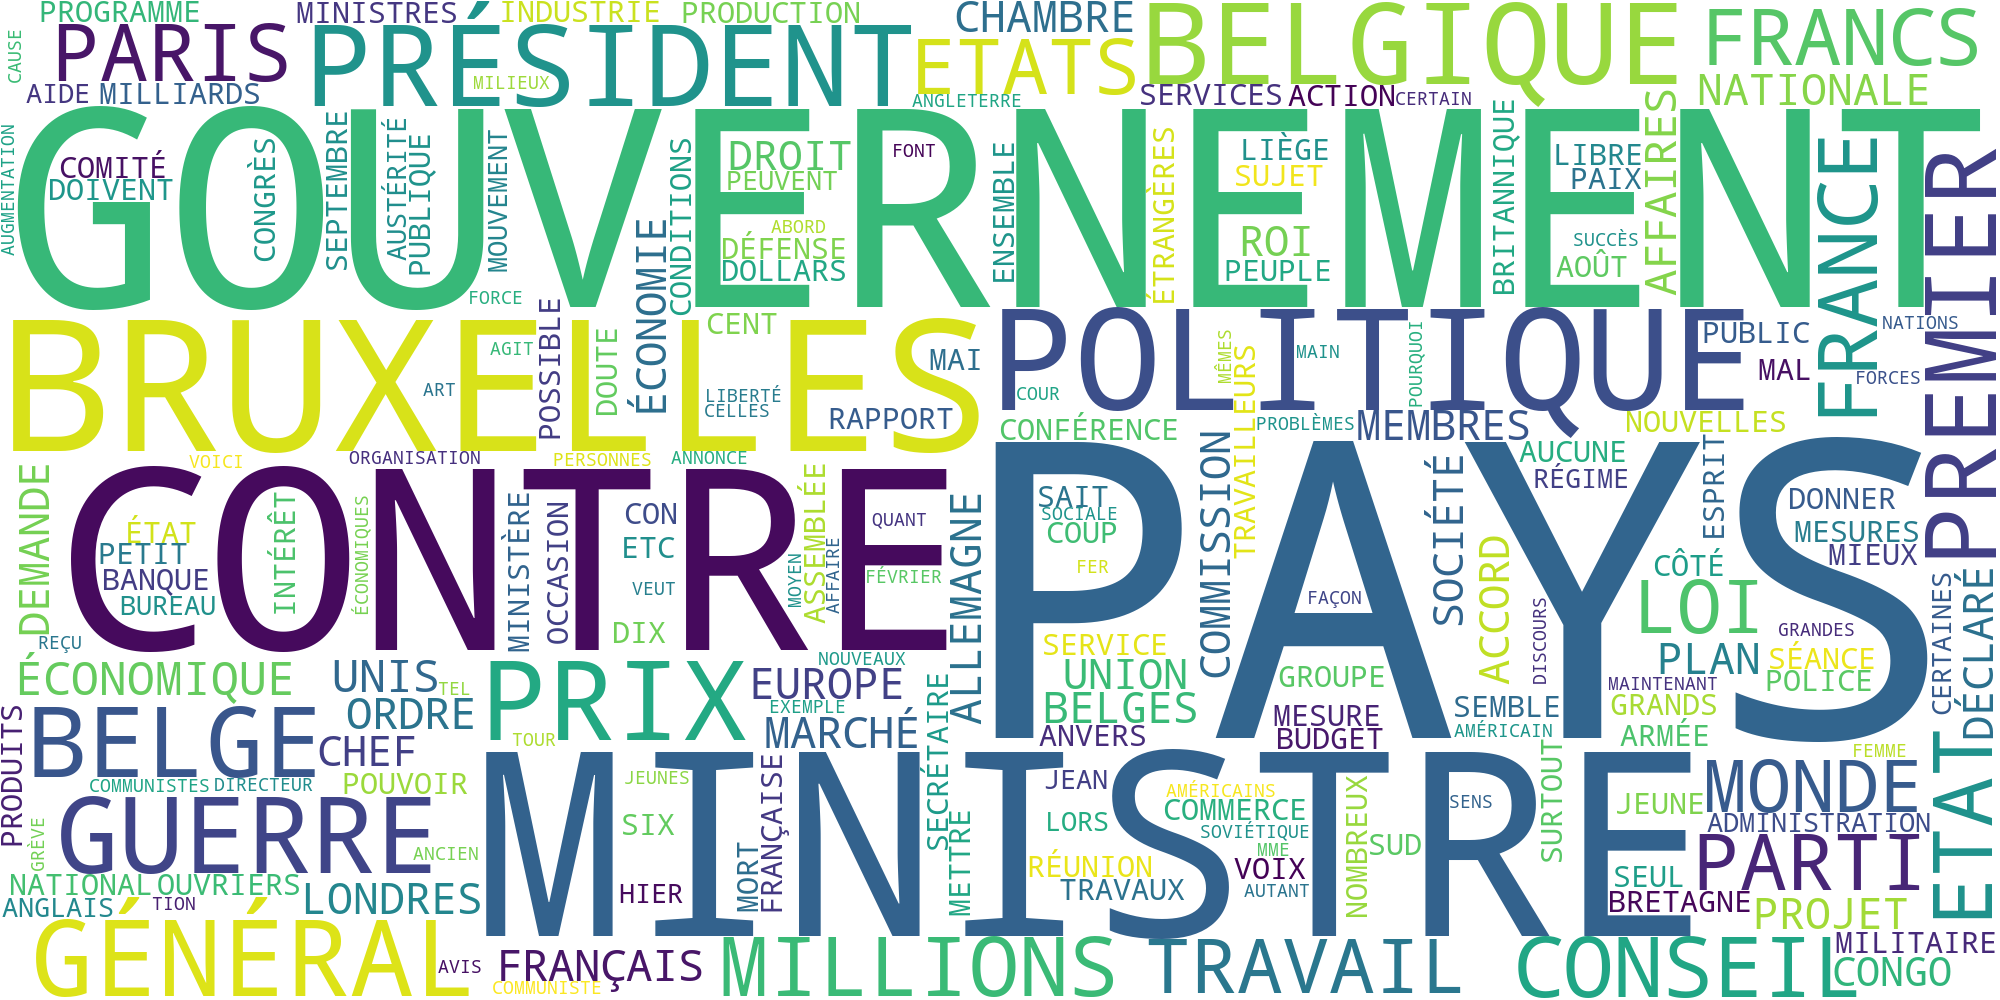

In [12]:
# Générer le nuage de mots à partir des fréquences
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)

# Nom du fichier de sortie
output_file = "tp4.png"

# Sauvegarder l'image
cloud.to_file(os.path.join(temp_path, output_file))

# Afficher l'image dans le notebook
Image(filename=os.path.join(temp_path, output_file))

In [92]:
# Prendre les 50 mots les plus fréquents
top_20 = Counter(frequencies).most_common(50)

# Afficher
for i, (mot, freq) in enumerate(top_20, start=1):
    print(f"{i}. {mot} → score : {freq}")


#freq = fréquence ou score

#Résultat : liste des 20 mots les plus importants avec leur score

1. PAYS → score : 8907
2. GOUVERNEMENT → score : 8072
3. MINISTRE → score : 6987
4. CONTRE → score : 6757
5. BRUXELLES → score : 5725
6. POLITIQUE → score : 5480
7. PRÉSIDENT → score : 5207
8. BELGIQUE → score : 5185
9. PRIX → score : 4980
10. GUERRE → score : 4630
11. GÉNÉRAL → score : 4505
12. PREMIER → score : 4002
13. BELGE → score : 3817
14. CONSEIL → score : 3789
15. ETAT → score : 3732
16. MILLIONS → score : 3721
17. FRANCE → score : 3628
18. PARIS → score : 3479
19. FRANCS → score : 3389
20. PARTI → score : 3313
21. ETATS → score : 3246
22. TRAVAIL → score : 3177
23. LOI → score : 3039
24. MONDE → score : 2993
25. ÉCONOMIQUE → score : 2947
26. UNIS → score : 2879
27. ORDRE → score : 2773
28. AFFAIRES → score : 2727
29. FRANÇAIS → score : 2670
30. MARCHÉ → score : 2652
31. PLAN → score : 2590
32. NATIONALE → score : 2538
33. CHAMBRE → score : 2515
34. BELGES → score : 2511
35. EUROPE → score : 2503
36. LONDRES → score : 2474
37. PROJET → score : 2435
38. ALLEMAGNE → score : 2421